In [1]:
%load_ext rpy2.ipython

In [16]:
%%R
library(ggplot2)
library(dplyr)
library(phyloseq)
library(magrittr)

In [7]:
%%R
sd = read.table("../data/sample_data_combined_qiime_format.tsv",
           sep = "\t", 
           comment = "",
           header = TRUE)

rownames(sd) = sd$X.SampleID

ps = import_biom("../data/otu_table_wtax.biom")

sample_data(ps) = sample_data(sd)

ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4340 taxa and 158 samples ]
sample_data() Sample Data:       [ 158 samples by 46 sample variables ]
tax_table()   Taxonomy Table:    [ 4340 taxa by 8 taxonomic ranks ]


In [9]:
%%R
mdf = psmelt(ps)

In [22]:
%%R
top.9 = mdf %>%
    group_by(Rank2) %>%
    summarize(total = sum(Abundance)) %>%
    arrange(desc(total)) %>%
    filter(rank(desc(total)) <= 9) %>%
    extract2("Rank2")

In [32]:
%%R
top.9

[1] Cyanobacteria   Proteobacteria  Actinobacteria  Acidobacteria  
[5] Firmicutes      Bacteroidetes   Chloroflexi     Verrucomicrobia
[9] Armatimonadetes
9 Levels: Acidobacteria Actinobacteria Armatimonadetes ... Verrucomicrobia


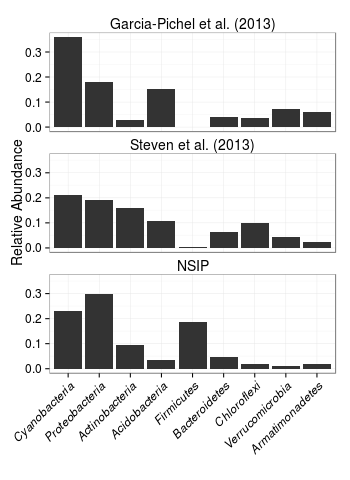

In [42]:
%%R -w 350
d = mdf %>%
    group_by(study, Rank2) %>%
    summarize(S = sum(Abundance)) %>%
    group_by(study) %>%
    mutate(RA = S / sum(S)) %>%
    filter(Rank2 %in% top.9)

d$Rank2 = factor(d$Rank2, levels = top.9)
d$study = factor(d$study, levels = c("Garcia-Pichel et al. (2013)",
                                     "Steven et al. (2013)", 
                                     "NSIP"))

p = ggplot(d, aes(x = Rank2, y = RA))

p = p + facet_wrap(~study, ncol = 1)

p = p + geom_bar(stat = "identity")

p = p + labs(y = "Relative Abundance", x = "")

p = p + theme_bw()

p = p + theme(strip.background = element_blank(),
              strip.text = element_text(size = 14), 
              axis.title = element_text(size = 14),
              axis.text.y = element_text(size = 12),
              axis.text.x = element_text(size = 12, hjust = 1, angle = 45, face = "italic"))

p